In [78]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)
random.seed(42)

# Configuración
n_rows = 300
products = ['Laptop', 'Mouse', 'Monitor', 'Teclado', 'Auriculares']
regions = ['Norte', 'Sur', 'Este', 'Oeste', 'Centro']

# Generación de datos base
data = {
    'OrderID': range(1001, 1001 + n_rows),
    'Fecha': [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(n_rows)],
    'Producto': [random.choice(products) for _ in range(n_rows)],
    'Region': [random.choice(regions) for _ in range(n_rows)],
    'Ventas': [round(random.uniform(20.0, 1500.0), 2) for _ in range(n_rows)],
    'Cantidad': [random.randint(1, 10) for _ in range(n_rows)],
    'Descuento': [random.choice([0, 0.05, 0.1, 0.2]) for _ in range(n_rows)]
}

df = pd.DataFrame(data)

# --- INYECCIÓN DE SUCIEDAD (Para que practiques) ---

# 1. Introducir valores nulos (NaN)
df.loc[df.sample(frac=0.05).index, 'Region'] = np.nan
df.loc[df.sample(frac=0.03).index, 'Producto'] = np.nan

# 2. Tipos de datos incorrectos: Convertir algunas ventas a string con símbolo '$'
indices_sucios = df.sample(frac=0.1).index
df.loc[indices_sucios, 'Ventas'] = df.loc[indices_sucios, 'Ventas'].apply(lambda x: f"${x}")

# 3. Duplicados: Duplicar las primeras 5 filas y añadirlas al final
df = pd.concat([df, df.head(5)], ignore_index=True)

# 4. Inconsistencia: Poner una 'Cantidad' negativa (imposible en la realidad)
df.loc[10, 'Cantidad'] = -5

# 5. Texto sucio: Poner 'Teclado' en minúsculas en algunos casos para crear inconsistencia
df.loc[df['Producto'] == 'Teclado', 'Producto'] = [random.choice(['Teclado', 'teclado']) for _ in range(sum(df['Producto'] == 'Teclado'))]

print("✅ Dataset creado con éxito. Variable almacenada como 'df'.")

✅ Dataset creado con éxito. Variable almacenada como 'df'.


C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_5192\3663291173.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['$1126.27' '$395.89' '$672.42' '$1420.04' '$885.15' '$297.62' '$380.72'
 '$1034.98' '$74.79' '$497.04' '$1210.86' '$477.22' '$1451.56' '$772.2'
 '$33.91' '$837.33' '$954.12' '$1427.16' '$418.88' '$235.44' '$998.55'
 '$662.28' '$917.48' '$424.67' '$1450.42' '$978.5' '$1022.86' '$485.49'
 '$321.27' '$443.57']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[indices_sucios, 'Ventas'] = df.loc[indices_sucios, 'Ventas'].apply(lambda x: f"${x}")


In [79]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    305 non-null    int64         
 1   Fecha      305 non-null    datetime64[ns]
 2   Producto   295 non-null    object        
 3   Region     290 non-null    object        
 4   Ventas     305 non-null    object        
 5   Cantidad   305 non-null    int64         
 6   Descuento  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 16.8+ KB


In [80]:
df.isnull().sum()

OrderID       0
Fecha         0
Producto     10
Region       15
Ventas        0
Cantidad      0
Descuento     0
dtype: int64

In [81]:
df.head(10)

,OrderID,Fecha,Producto,Region,Ventas,Cantidad,Descuento
0,1001,2023-11-24,Mouse,Oeste,362.58,3,0.00
1,1002,2023-02-27,Teclado,Norte,1066.29,7,0.05
2,1003,2023-01-13,NaN,Este,1060.42,2,0.10
3,1004,2023-05-21,Teclado,Sur,691.97,8,0.05
4,1005,2023-05-06,Monitor,Este,1037.33,10,0.05
5,1006,2023-04-25,Teclado,NaN,1387.39,7,0.05
6,1007,2023-03-13,Monitor,Este,1185.99,5,0.00
7,1008,2023-02-22,Teclado,Centro,945.09,1,0.05
8,1009,2023-12-13,Auriculares,Norte,$998.55,6,0.20
9,1010,2023-10-07,teclado,NaN,1401.83,4,0.20


In [82]:
df['Producto'].value_counts()

Producto
Monitor        63
Mouse          61
Auriculares    61
Laptop         54
Teclado        29
teclado        27
Name: count, dtype: int64

In [83]:
#cambio teclado por Teclado
df['Producto']=df['Producto'].str.replace('teclado','Teclado')
df['Producto'].value_counts()

Producto
Monitor        63
Mouse          61
Auriculares    61
Teclado        56
Laptop         54
Name: count, dtype: int64

In [84]:
#Cambio nulls por Desconocido en region
df['Region'] = df['Region'].fillna('Desconocido')
df['Region'].value_counts()

Region
Oeste          68
Este           59
Norte          55
Sur            55
Centro         53
Desconocido    15
Name: count, dtype: int64

In [85]:
#Dropeo nulls en Productos
df=df.dropna(subset=['Producto'])
df.isnull().sum()

OrderID      0
Fecha        0
Producto     0
Region       0
Ventas       0
Cantidad     0
Descuento    0
dtype: int64

In [86]:
#Elimino valor negativo
df=df[df['Cantidad'] > 0]
df

,OrderID,Fecha,Producto,Region,Ventas,Cantidad,Descuento
0,1001,2023-11-24,Mouse,Oeste,362.58,3,0.00
1,1002,2023-02-27,Teclado,Norte,1066.29,7,0.05
3,1004,2023-05-21,Teclado,Sur,691.97,8,0.05
4,1005,2023-05-06,Monitor,Este,1037.33,10,0.05
5,1006,2023-04-25,Teclado,Desconocido,1387.39,7,0.05
...,...,...,...,...,...,...,...
299,1300,2023-01-31,Monitor,Norte,640.31,4,0.10
300,1001,2023-11-24,Mouse,Oeste,362.58,3,0.00
301,1002,2023-02-27,Teclado,Norte,1066.29,7,0.05
303,1004,2023-05-21,Teclado,Sur,691.97,8,0.05


In [87]:
#Hay cantidades negativas
df['Ventas'].head(20)

0      362.58
1     1066.29
3      691.97
4     1037.33
5     1387.39
6     1185.99
7      945.09
8     $998.55
9     1401.83
11     825.95
12     $978.5
13    1364.45
14    1243.41
15     125.69
16     265.57
17     475.27
18    1128.46
19     862.43
20     447.14
21     204.04
Name: Ventas, dtype: object

In [88]:
#limpio ventas y la paso a float
df['Ventas']=df['Ventas'].astype(str)
df['Ventas']=df['Ventas'].str.replace('$','')
df['Ventas']=df['Ventas'].astype(float)

In [89]:
sns.set_theme(style="whitegrid")
print("Estadísticas de Ventas y Cantidad:")
df.describe()


Estadísticas de Ventas y Cantidad:


,OrderID,Fecha,Ventas,Cantidad,Descuento
count,294.000000,294,294.000000,294.000000,294.000000
mean,1148.333333,2023-06-27 22:17:08.571428608,836.575340,5.489796,0.088265
min,1001.000000,2023-01-01 00:00:00,33.910000,1.000000,0.000000
25%,1073.250000,2023-03-26 06:00:00,496.432500,3.000000,0.050000
50%,1147.500000,2023-06-23 12:00:00,860.000000,6.000000,0.100000
75%,1223.750000,2023-10-02 00:00:00,1189.960000,8.000000,0.100000
max,1300.000000,2024-01-01 00:00:00,1499.370000,10.000000,0.200000
std,87.585421,NaN,408.756265,2.873600,0.072310


--- Estadísticas de Ventas ---
count     294.000000
mean      836.575340
std       408.756265
min        33.910000
25%       496.432500
50%       860.000000
75%      1189.960000
max      1499.370000
Name: Ventas, dtype: float64

--- Conteo de Productos ---
Producto
Monitor        63
Auriculares    61
Mouse          60
Teclado        56
Laptop         54
Name: count, dtype: int64


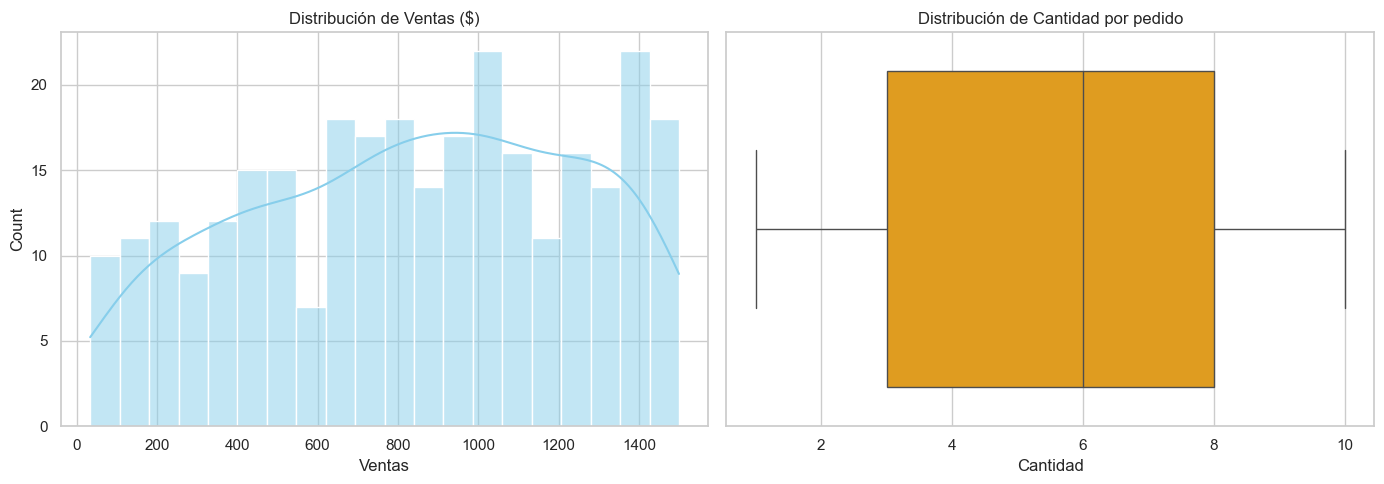

In [90]:
# --- 3. ANÁLISIS FASE 2 ---
print("--- Estadísticas de Ventas ---")
print(df['Ventas'].describe()) # Usamos print para evitar errores de entorno

print("\n--- Conteo de Productos ---")
print(df['Producto'].value_counts())

# Configuración visual (opcional, pero hace los gráficos más bonitos)
sns.set_theme(style="whitegrid")

# --- CÓDIGO GRÁFICO ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Histograma de Ventas
# Nota: A veces el linter (el corrector de código) de VS Code se queja
# falsamente con seaborn. Si el código corre, ignora la línea roja.
sns.histplot(data=df, x='Ventas', bins=20, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribución de Ventas ($)')

# Subplot 2: Boxplot de Cantidad
sns.boxplot(data=df, x='Cantidad', ax=ax[1], color='orange')
ax[1].set_title('Distribución de Cantidad por pedido')

plt.tight_layout()
plt.show()

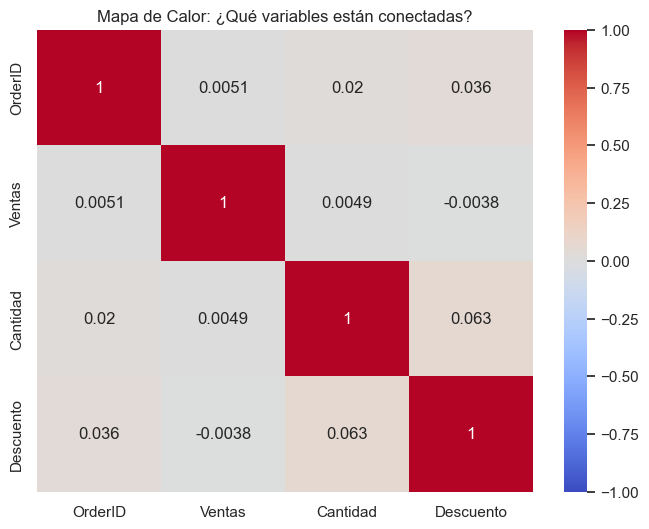

In [91]:
# Matriz de Correlación (Mapa de Calor)
# Solo funciona con columnas numéricas, así que filtramos
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor: ¿Qué variables están conectadas?')
plt.show()

In [ ]:
#ventas por region con el group by
ventas_por_region=df.groupby('Region')['Ventas'].sum().sort_values(ascending=False)
ventas_por_region

Region
Oeste          52571.47
Centro         48123.09
Este           47868.68
Norte          42941.27
Sur            39559.01
Desconocido    14889.63
Name: Ventas, dtype: float64

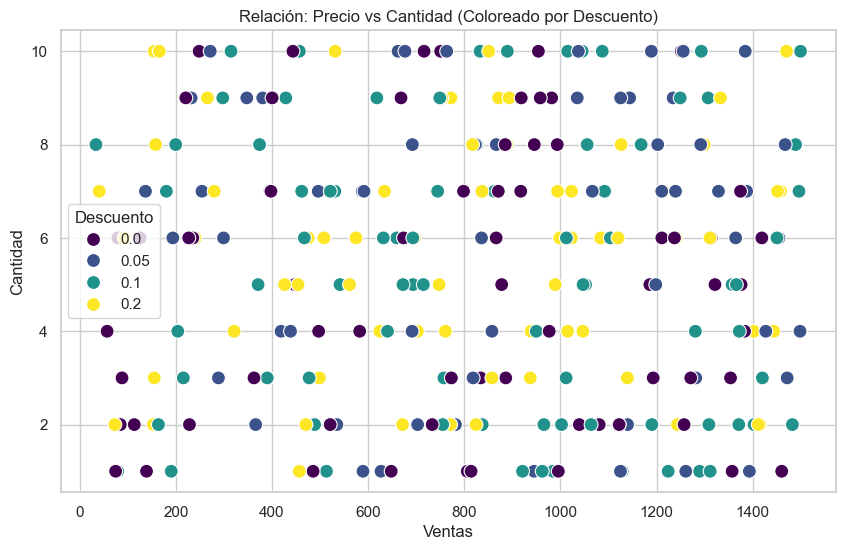

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Ventas', 
    y='Cantidad', 
    hue='Descuento',   # Color según el descuento
    palette='viridis', 
    s=100              # Tamaño de los puntos
)
plt.title('Relación: Precio vs Cantidad (Coloreado por Descuento)')
plt.show()